In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

In [333]:
df_er = pd.read_csv("EXKOUS.csv")
df_ffr = pd.read_csv("FEDFUNDS.csv")

In [334]:
lowest_date = max(df_ffr['DATE'][0], df_er['DATE'][0])

In [335]:
df_er = df_er[df_er.DATE >= lowest_date]
df_ffr = df_ffr[df_ffr.DATE >= lowest_date]

In [336]:
# df_er = df_er.set_index("DATE")
# df_ffr = df_ffr.set_index("DATE")

In [337]:
df_both = pd.merge(df_er, df_ffr, on='DATE')

In [338]:
df_both['DATE'] = pd.to_datetime(df_both.DATE)

In [339]:
# normalized_df=(df_both - df_both.mean())/df_both.std()
cols_to_norm = ['EXKOUS', 'FEDFUNDS']
df_both[cols_to_norm] = df_both[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [340]:
df_both

,DATE,EXKOUS,FEDFUNDS
0,1981-04-01,0.007630,0.822386
1,1981-05-01,0.012193,0.969522
2,1981-06-01,0.014571,1.000000
3,1981-07-01,0.016589,0.996847
4,1981-08-01,0.017879,0.932738
...,...,...,...
463,2019-11-01,0.479794,0.077772
464,2019-12-01,0.486929,0.077772
465,2020-01-01,0.479951,0.077772
466,2020-02-01,0.506803,0.079348


In [341]:
sns.set(rc={'figure.figsize':(11,8)})

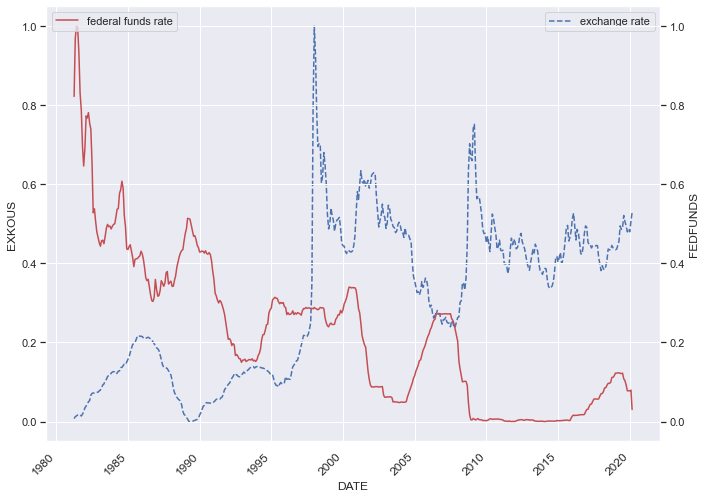

In [331]:
ax = sns.lineplot(data=df_both, x='DATE', y='EXKOUS', color='b', label='exchange rate')
ax.lines[0].set_linestyle("--")
plt.legend(loc='upper right')


ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium')


ax2 = plt.twinx()
ax2 = sns.lineplot(data=df_both, x='DATE', y='FEDFUNDS', color='r', label='federal funds rate')
plt.legend(loc='upper left')
